# Plotting ROC curve

In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from torchvision import datasets, transforms

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt
import bokeh
import bokeh.plotting
from bokeh.layouts import column, row
from bokeh.models import HoverTool,WheelZoomTool, PanTool, ResetTool
bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
def data_processed():
    '''
    Used to read & normalize processed test and train data
    '''
    data_train = pd.read_csv("data/2022-02-07_LOANS_TRAIN.csv")
    data_test = pd.read_csv("data/2022-02-07_LOANS_TEST.csv")
    y_train = data_train['loan_status']
    data_train.drop('loan_status', 1, inplace=True)
    data_train.drop('id', 1, inplace=True)
    data_test.drop('id', 1, inplace=True)
    
    scaler = StandardScaler()
    scaler.fit(data_train)
    normal_data_train = scaler.transform(data_train)
    normal_data_test = scaler.transform(data_test)
    
    return normal_data_train, normal_data_test, y_train

def to_submission(y_test_predicted_probability):
    y_test = pd.DataFrame(y_test_predicted_probability, columns=['loan_status'])
    y_test.to_csv('data/submission.csv', index_label='id')
    return

In [7]:
X_train, X_test, y_train = data_processed()

print(f"""
X_train shape: {X_train.shape}
y_train shape: {y_train.shape}
""")

/var/folders/h7/dxctt03x2vjdfbhcmgymr3400000gn/T/ipykernel_17652/1340814763.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_train.drop('loan_status', 1, inplace=True)
/var/folders/h7/dxctt03x2vjdfbhcmgymr3400000gn/T/ipykernel_17652/1340814763.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_train.drop('id', 1, inplace=True)
/var/folders/h7/dxctt03x2vjdfbhcmgymr3400000gn/T/ipykernel_17652/1340814763.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_test.drop('id', 1, inplace=True)



X_train shape: (197250, 92)
y_train shape: (197250,)



In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42, shuffle=True)

print(f"""
X_train shape: {X_train.shape}
y_train shape: {y_train.shape}
X_test shape: {X_test.shape}
y_test shape: {y_test.shape}
""")


X_train shape: (132157, 92)
y_train shape: (132157,)
X_test shape: (65093, 92)
y_test shape: (65093,)



In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [10]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [11]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.6845232398693777 0.5659321058970078


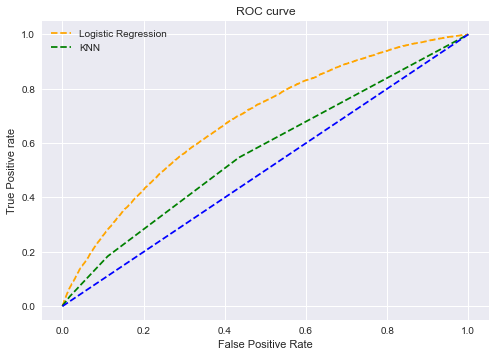

In [12]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();